# Exploration

In [1]:
import pyarrow.parquet as pq
import pyarrow.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1) Laden der Daten

In [2]:
import pandas as pd
import glob

# Pfad zu den Parquet-Dateien
path = "./data/parquet/2024"

# Alle Dateien sammeln
files = glob.glob(f"{path}/*.parquet")

dfs = []

# Mapping für unterschiedliche Spaltennamen
# (Beispiel: bei yellow heißt's 'tpep_pickup_datetime', bei green 'lpep_pickup_datetime')
column_map = {
    "tpep_pickup_datetime": "pickup_datetime",
    "lpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "lpep_dropoff_datetime": "dropoff_datetime",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    # weitere Spalten angleichen
}

for file in files:
    df = pd.read_parquet(file)
    # Spaltennamen vereinheitlichen
    df = df.rename(columns=column_map)
    dfs.append(df)

# Alle zusammenfassen
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee
0,2,2024-04-01 00:18:50,2024-04-01 00:19:48,N,1.0,146,146,1.0,0.15,3.7,...,0.5,0.00,0.0,NaN,1.0,6.20,2.0,1.0,0.00,NaN
1,2,2024-04-01 00:56:16,2024-04-01 01:12:56,N,1.0,65,225,1.0,3.06,17.7,...,0.5,4.04,0.0,NaN,1.0,24.24,1.0,1.0,0.00,NaN
2,2,2024-04-01 00:23:09,2024-04-01 00:33:03,N,1.0,226,146,1.0,1.95,11.4,...,0.5,3.48,0.0,NaN,1.0,17.38,1.0,1.0,0.00,NaN
3,2,2024-03-31 22:34:23,2024-03-31 22:45:33,N,1.0,74,116,1.0,1.93,12.8,...,0.5,3.06,0.0,NaN,1.0,18.36,1.0,1.0,0.00,NaN
4,2,2024-03-31 23:21:41,2024-03-31 23:29:40,N,1.0,236,238,1.0,1.50,10.7,...,0.5,0.80,0.0,NaN,1.0,16.75,1.0,1.0,2.75,NaN


## Datentypen
Die Datentypen wurden richtig geladen. "Pickup_datetime" und "dropoff_datetime" sind im datetime64[us] Format.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41829938 entries, 0 to 41829937
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   pickup_datetime        datetime64[us]
 2   dropoff_datetime       datetime64[us]
 3   store_and_fwd_flag     object        
 4   RatecodeID             float64       
 5   pickup_location_id     int32         
 6   dropoff_location_id    int32         
 7   passenger_count        float64       
 8   trip_distance          float64       
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  ehail_fee              float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  payment_type           float64       
 18  trip_type           

# Big Five
Für einen ersten Überblick werden die "Big 5" analysiert.

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,41829938.0,1.76603,1.0,2.0,2.0,2.0,7.0,0.424714
pickup_datetime,41829938,2024-07-06 07:22:56.772288,2002-12-31 16:46:07,2024-04-06 18:23:38,2024-07-03 19:40:10.500000,2024-10-08 15:31:01,2026-06-26 23:53:12,NaN
dropoff_datetime,41829938,2024-07-06 07:40:26.891284,2002-12-31 17:24:07,2024-04-06 18:41:11.250000,2024-07-03 19:56:17.500000,2024-10-08 15:53:40.750000,2026-06-27 20:59:10,NaN
RatecodeID,37714378.0,2.303478,1.0,1.0,1.0,1.0,99.0,10.838013
pickup_location_id,41829938.0,163.171895,1.0,132.0,161.0,233.0,265.0,64.789044
dropoff_location_id,41829938.0,163.097611,1.0,113.0,162.0,234.0,265.0,69.77124
passenger_count,37714378.0,1.333645,0.0,1.0,1.0,1.0,9.0,0.818878
trip_distance,41829938.0,5.166204,0.0,1.01,1.76,3.36,398608.62,434.885877
fare_amount,41829938.0,19.254112,-2261.2,9.3,13.5,22.6,335544.44,76.143111
extra,41829938.0,1.378763,-9.25,0.0,1.0,2.5,65.99,1.810975


## Ersteindruck mit describe function

Die Daten wirken auf den ersten Eindruck vielversprechend. Die durchschnittstwerte wirken sehr realistisch und passen auf die intuitiven Erwartungen. Trotzdem gibt es ein paar Auffälligkeiten.

## Auffälligkeiten

### Negative Werte (min)
| Spalte        | min    |
|---------------|------------:|
| **fare_amount**  | -2,261.20   |
| **tip_amount**   | -300.00     |
| **total_amount** | -2,265.45   |

---

### Extrem hohe Werte (max)
| Spalte          | max      |
|-----------------|---------------:|
| **trip_distance** | 398,608.62    |
| **fare_amount**   | 335,544.44    |
| **total_amount**  | 335,550.94    |

---

Diese Werte sind auffällige Ausreißer und deuten auf fehlerhafte Daten hin. Diese sollten auf Datenqualität geprüft werden und ggf. entfernt(bereinigt) werden.



## Null-Werte
Zu erkennen ist, dass die meisten Features soweit keine null-werte enthalten. 
Vor allem die für unsere User-stories relevanten wirken ziemlich vollständig. Beispielsweise pickup_datetime und dropoff_datetime sind immer verfügbar.
Beim payment_type gibt es ein paar null-werte, jedoch ist das im Verhältnis zur gesamten Menge an Daten noch überschaubar.

In [6]:
df.isnull().sum()

VendorID                        0
pickup_datetime                 0
dropoff_datetime                0
store_and_fwd_flag        4115560
RatecodeID                4115560
pickup_location_id              0
dropoff_location_id             0
passenger_count           4115560
trip_distance                   0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
ehail_fee                41829938
improvement_surcharge           0
total_amount                    0
payment_type                24328
trip_type                41194130
congestion_surcharge      4115560
Airport_fee               4751450
dtype: int64

# Zusätzliche Spalten
## 1) Trip duration
Um die die Datensätze auf pickup_datetime und dropoff_datetime zu korrektheit zu testen wird die Fahrtdauer in Minuten berechnet und als neues Feature hinzugefügt.

In [7]:
df["trip_duration_min"] = (
    (df["dropoff_datetime"] - df["pickup_datetime"]).dt.total_seconds() / 60
)
df[["pickup_datetime", "dropoff_datetime", "trip_duration_min"]].head()

,pickup_datetime,dropoff_datetime,trip_duration_min
0,2024-04-01 00:18:50,2024-04-01 00:19:48,0.966667
1,2024-04-01 00:56:16,2024-04-01 01:12:56,16.666667
2,2024-04-01 00:23:09,2024-04-01 00:33:03,9.900000
3,2024-03-31 22:34:23,2024-03-31 22:45:33,11.166667
4,2024-03-31 23:21:41,2024-03-31 23:29:40,7.983333


Es konnte für alle Fahrten eine Differenz berechnet werden

In [8]:
df["trip_duration_min"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41829938 entries, 0 to 41829937
Series name: trip_duration_min
Non-Null Count     Dtype  
--------------     -----  
41829938 non-null  float64
dtypes: float64(1)
memory usage: 319.1 MB


Die berechneten Werte werden auch nochmal mit describe() ausgegeben.

Im output kommt wieder ein negativer Wert in der min-Spalte vor. Das bedeutet, dass trotz der vollständigen Daten in diesem Feature nicht alle korrekt sind.

In [9]:
df["trip_duration_min"].describe()

count    4.182994e+07
mean     1.750198e+01
std      3.545899e+01
min     -1.427050e+03
25%      7.816667e+00
50%      1.296667e+01
75%      2.105000e+01
max      9.767517e+03
Name: trip_duration_min, dtype: float64

### Negative Werte im Min
Wie viele sind betroffen?

In [10]:
df[df["trip_duration_min"] < 0].count()

VendorID                 1577
pickup_datetime          1577
dropoff_datetime         1577
store_and_fwd_flag        989
RatecodeID                989
pickup_location_id       1577
dropoff_location_id      1577
passenger_count           989
trip_distance            1577
fare_amount              1577
extra                    1577
mta_tax                  1577
tip_amount               1577
tolls_amount             1577
ehail_fee                   0
improvement_surcharge    1577
total_amount             1577
payment_type             1577
trip_type                   2
congestion_surcharge      989
Airport_fee               987
trip_duration_min        1577
dtype: int64

1577 sind im Verhältnis zur gesamten Menge an Daten grundsätzlich nicht extrem viel, jedoch wird das Problem mit diesen Datensätzen genauer analysiert.

Wie sehen solche Datensätze aus?

In [11]:
df.loc[df["trip_duration_min"] < 0].head()

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min
86285,1,2024-04-01 12:30:00,2024-04-01 12:09:12,N,99.0,137,213,1.0,8.2,34.5,...,0.0,0.0,NaN,1.0,36.0,1.0,NaN,0.0,0.0,-20.800000
109111,1,2024-04-01 16:00:00,2024-04-01 15:36:02,N,99.0,95,216,1.0,3.0,23.5,...,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0,0.0,-23.966667
631403,1,2024-04-06 12:30:00,2024-04-06 11:51:16,N,99.0,208,241,1.0,5.9,31.5,...,0.0,0.0,NaN,1.0,33.0,1.0,NaN,0.0,0.0,-38.733333
827333,1,2024-04-08 13:00:00,2024-04-08 12:32:42,N,99.0,117,35,1.0,7.8,35.5,...,0.0,0.0,NaN,1.0,37.0,1.0,NaN,0.0,0.0,-27.300000
1043461,1,2024-04-10 16:00:00,2024-04-10 15:27:39,N,99.0,254,242,1.0,3.5,24.5,...,0.0,0.0,NaN,1.0,26.0,1.0,NaN,0.0,0.0,-32.350000


Aus dem head kann man noch keine direkten Zusammenhänge erkennen. Auffällig ist aber, dass aus den den Datensätzen mit negativer Fahrtdauer rund 2 drittel das Datum "2024-11-03" als pickup_datetime haben.

Am 3. November 2024 wurde in New York die Uhr von Sommer- auf Normalzeit zurückgestellt. Die Stunde zwischen 1:00 und 2:00 Uhr kommt doppelt vor, wodurch Zeitstempel in dieser Periode ohne Zeitzonenangabe zu negativen Fahrtdauern führen können. 

In [12]:
df.loc[df["trip_duration_min"] < 0, "pickup_datetime"].dt.date.value_counts()

pickup_datetime
2024-11-03    1005
2024-03-21      19
2024-12-31      16
2024-03-19      13
2024-03-12      12
              ... 
2024-01-15       1
2024-05-03       1
2024-05-09       1
2024-02-17       1
2024-01-26       1
Name: count, Length: 185, dtype: int64

Dadurch sind alle Fahrten, welche zu dieser Zeit stattgefunden haben auch fehlerhaft, da die information einer Stunde verloren geht. Somit sollten noch mehr Daten als die gezeigten 1000 herausgefiltert werden.

In [13]:
dst_date_november = pd.to_datetime("2024-11-03")  # Datum der Zeitumstellung
dst_1 = dst_date_november + pd.Timedelta(hours=1)
dst_2 = dst_date_november + pd.Timedelta(hours=2)

# Korrekte Schreibweise mit Klammern
df_dst_affected_november = df[(df['dropoff_datetime'] >= dst_1) & (df['pickup_datetime'] <= dst_2)]

df_dst_affected_november

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min
35227039,2,2024-11-02 01:37:45,2024-11-03 01:24:52,N,1.0,107,164,1.0,1.14,10.70,...,1.57,0.0,NaN,1.0,17.27,1.0,NaN,2.50,0.0,1427.116667
35227580,2,2024-11-02 01:39:52,2024-11-03 01:14:27,N,1.0,114,246,1.0,3.46,19.10,...,0.00,0.0,NaN,1.0,24.10,1.0,NaN,2.50,0.0,1414.583333
35230973,2,2024-11-02 03:26:49,2024-11-03 03:15:47,N,1.0,79,170,1.0,2.81,16.30,...,0.00,0.0,NaN,1.0,21.30,1.0,NaN,2.50,0.0,1428.966667
35237186,2,2024-11-02 08:25:35,2024-11-03 08:22:47,N,1.0,230,170,1.0,1.05,21.90,...,0.00,0.0,NaN,1.0,25.90,2.0,NaN,2.50,0.0,1437.200000
35240121,2,2024-11-02 09:45:28,2024-11-03 09:23:23,N,1.0,237,234,3.0,2.79,21.90,...,3.88,0.0,NaN,1.0,29.78,1.0,NaN,2.50,0.0,1417.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41724575,1,2024-11-03 01:10:09,2024-11-03 01:31:56,N,1.0,25,90,2.0,5.10,25.40,...,0.00,0.0,NaN,1.0,30.65,2.0,1.0,2.75,NaN,21.783333
41724576,2,2024-11-03 01:37:44,2024-11-03 01:43:50,N,1.0,42,42,1.0,0.97,7.90,...,0.00,0.0,NaN,1.0,10.40,1.0,1.0,0.00,NaN,6.100000
41724608,2,2024-11-03 01:38:30,2024-11-03 01:50:52,N,1.0,75,233,1.0,3.48,17.00,...,4.45,0.0,NaN,1.0,26.70,1.0,1.0,2.75,NaN,12.366667
41771888,2,2024-11-03 00:50:00,2024-11-03 01:06:00,None,NaN,243,32,NaN,6.20,29.38,...,6.18,0.0,NaN,1.0,37.06,NaN,NaN,NaN,NaN,16.000000


Wie man sehen kann sind somit ganze 11675 Datensätze eher unbrauchbar, da nicht mehr Klar ist ob eine Stunde in der Fahrtdauer fehlt.

Die insgesamt 11675 sind immernoch kein großes Problem zu unserer gesamten Datenmenge. Jedoch sollte nun auch die zweite Zeitverschiebung im Jahr einberechnet werden und auch diese Daten eventuell entfernt werden. 

Natürlich führt das zu einer gewissen verzerrung unserer Daten. Man könnte versuchen anhand der Streckendistanz zu entnscheiden, ob diese Stunde zur Fahrtzeit addiert werden soll oder nicht, jedoch wird das im Ramen dieses Projektes nicht umgesetzt.

In [14]:
dst_date_march = pd.to_datetime("2024-03-10")  # Datum der Zeitumstellung
dst_1 = dst_date_march + pd.Timedelta(hours=1)
dst_2 = dst_date_march + pd.Timedelta(hours=2)

# Korrekte Schreibweise mit Klammern
df_dst_affected_march = df[(df['dropoff_datetime'] >= dst_1) & (df['pickup_datetime'] <= dst_2)]

df_dst_affected_march

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min
14915018,2,2024-03-09 01:21:51,2024-03-10 01:19:42,N,1.0,232,90,1.0,2.95,16.30,...,0.00,0.0,NaN,1.0,21.30,1.0,NaN,2.50,0.0,1437.850000
14916119,2,2024-03-09 01:25:26,2024-03-10 01:09:24,N,1.0,79,79,1.0,0.63,7.20,...,1.22,0.0,NaN,1.0,13.42,1.0,NaN,2.50,0.0,1423.966667
14917658,2,2024-03-09 01:40:13,2024-03-10 01:21:25,N,1.0,79,233,1.0,2.84,17.70,...,4.54,0.0,NaN,1.0,27.24,1.0,NaN,2.50,0.0,1421.200000
14919447,2,2024-03-09 02:31:02,2024-03-10 02:09:54,N,1.0,114,48,1.0,3.36,19.10,...,3.62,0.0,NaN,1.0,27.72,1.0,NaN,2.50,0.0,1418.866667
14920809,2,2024-03-09 02:24:19,2024-03-10 02:22:59,N,1.0,79,230,1.0,3.34,17.00,...,0.00,0.0,NaN,1.0,22.00,1.0,NaN,2.50,0.0,1438.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17677752,2,2024-03-09 20:48:29,2024-03-10 19:58:56,N,1.0,82,129,1.0,3.23,17.00,...,0.00,0.0,NaN,1.0,19.50,2.0,1.0,0.00,NaN,1390.450000
17677774,2,2024-03-10 01:36:54,2024-03-10 01:40:40,N,1.0,74,263,1.0,1.51,7.90,...,0.00,0.0,NaN,1.0,13.15,1.0,1.0,2.75,NaN,3.766667
17678603,2,2024-03-09 20:49:45,2024-03-10 20:07:01,N,1.0,260,7,1.0,2.30,17.00,...,2.50,0.0,NaN,1.0,21.00,1.0,1.0,0.00,NaN,1397.266667
17716880,2,2024-03-10 01:16:00,2024-03-10 01:46:00,None,NaN,198,61,NaN,6.14,29.37,...,6.07,0.0,NaN,1.0,36.44,NaN,NaN,NaN,NaN,30.000000


In [15]:
11675 + 6725

18400

Insgesamt werden so viele von Datensätze durch die Zeitumstellung inhaltlich bezüglich der Fahrtdauer problematisch.

### Ausreißer (Max-Werte):
Wie man aus dem Max entnehmen kann gibt es taxifahrten mit einer Dauer von bspw.: 9000 Minuten

In [16]:
df["trip_duration_min"].describe()

count    4.182994e+07
mean     1.750198e+01
std      3.545899e+01
min     -1.427050e+03
25%      7.816667e+00
50%      1.296667e+01
75%      2.105000e+01
max      9.767517e+03
Name: trip_duration_min, dtype: float64

Welche Daten sind betroffen?

In [17]:
max_trip_duration_outliers = df[df["trip_duration_min"] > 1000]
max_trip_duration_outliers.describe()

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min
count,20686.000000,20686,20686,20643.000000,20686.000000,20686.000000,20643.000000,20686.000000,20686.000000,20686.000000,...,20686.000000,20686.000000,0.0,20686.000000,20686.000000,20684.000000,2130.000000,20643.000000,18513.000000,20686.000000
mean,1.998743,2024-06-27 20:34:25.298511,2024-06-28 20:21:11.103983,1.143196,155.625205,158.567099,1.759580,10.316586,23.268538,1.013441,...,2.618424,0.657342,NaN,0.992183,31.286792,1.247389,1.076995,2.111006,0.147815,1426.763425
min,1.000000,2002-12-31 22:19:28,2003-01-01 18:58:09,1.000000,1.000000,1.000000,0.000000,0.000000,-2261.200000,-7.500000,...,-0.900000,-12.500000,NaN,-1.000000,-2265.450000,0.000000,1.000000,-2.750000,-1.750000,1000.816667
25%,2.000000,2024-04-03 11:42:19.250000,2024-04-04 11:58:56.500000,1.000000,100.000000,107.000000,1.000000,1.250000,10.700000,0.000000,...,0.000000,0.000000,NaN,1.000000,16.620000,1.000000,1.000000,2.500000,0.000000,1400.216667
50%,2.000000,2024-06-27 16:07:50,2024-06-28 15:54:03,1.000000,158.000000,161.000000,1.000000,2.140000,16.300000,1.000000,...,1.400000,0.000000,NaN,1.000000,22.680000,1.000000,1.000000,2.500000,0.000000,1421.650000
75%,2.000000,2024-10-04 16:34:38,2024-10-05 16:20:40.750000,1.000000,230.000000,231.000000,2.000000,4.140000,26.800000,1.000000,...,3.780000,0.000000,NaN,1.000000,34.440000,1.000000,1.000000,2.500000,0.000000,1433.162500
max,2.000000,2026-06-26 23:53:12,2026-06-27 20:59:10,99.000000,265.000000,265.000000,9.000000,86993.730000,2261.200000,11.750000,...,63.510000,77.700000,NaN,1.000000,2265.450000,4.000000,2.000000,2.750000,1.750000,9767.516667
std,0.035431,NaN,NaN,1.479124,67.308543,71.743657,1.448763,673.470158,37.240337,1.456200,...,3.921913,2.547127,NaN,0.117179,39.547569,0.459189,0.266647,0.930989,0.488663,288.267247


20.686 aus 41.829.937 Zeilen haben über 1.000 Fahrminuten. Im Verhältnis zur gesamten Menge an Daten ist dies wieder nicht so viel. 

Wie sieht die Verteilung dieser extremen Daten aus? 

In [18]:
max_trip_duration_outliers = max_trip_duration_outliers[max_trip_duration_outliers["trip_duration_min"] < 2000]

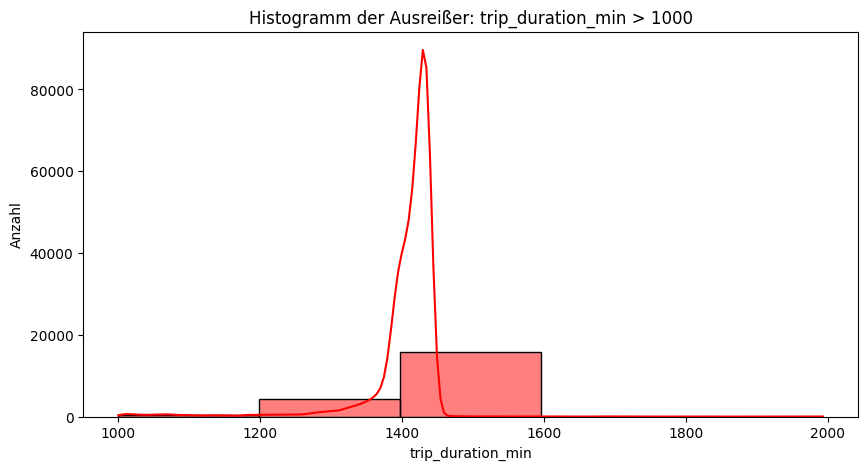

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(max_trip_duration_outliers["trip_duration_min"], bins=5, kde=True, color='red')
plt.title("Histogramm der Ausreißer: trip_duration_min > 1000")
plt.xlabel("trip_duration_min")
plt.ylabel("Anzahl")
plt.show()

In [20]:
bins = range(1000, 10100, 200)

# Werte in Bins einsortieren
max_trip_duration_outliers['duration_bin'] = pd.cut(
    max_trip_duration_outliers['trip_duration_min'], 
    bins=bins, 
    right=False  # linke Grenze inkl., rechte exkl.
)

# Anzahl pro Bin zählen
counts = max_trip_duration_outliers['duration_bin'].value_counts().sort_index()

print(counts)

duration_bin
[1000, 1200)       405
[1200, 1400)      4715
[1400, 1600)     15373
[1600, 1800)        13
[1800, 2000)        12
[2000, 2200)         0
[2200, 2400)         0
[2400, 2600)         0
[2600, 2800)         0
[2800, 3000)         0
[3000, 3200)         0
[3200, 3400)         0
[3400, 3600)         0
[3600, 3800)         0
[3800, 4000)         0
[4000, 4200)         0
[4200, 4400)         0
[4400, 4600)         0
[4600, 4800)         0
[4800, 5000)         0
[5000, 5200)         0
[5200, 5400)         0
[5400, 5600)         0
[5600, 5800)         0
[5800, 6000)         0
[6000, 6200)         0
[6200, 6400)         0
[6400, 6600)         0
[6600, 6800)         0
[6800, 7000)         0
[7000, 7200)         0
[7200, 7400)         0
[7400, 7600)         0
[7600, 7800)         0
[7800, 8000)         0
[8000, 8200)         0
[8200, 8400)         0
[8400, 8600)         0
[8600, 8800)         0
[8800, 9000)         0
[9000, 9200)         0
[9200, 9400)         0
[9400, 9600)         

#### Erkenntnisse
Es ist zu erkennen, dass die meisten Werte zwischen 1400-1600 sind. Was darauf hindeuten könnte, dass in manchen Fällen vielleicht der Zeitstempel bezüglich des Tages vielleicht Fehlerhaft war, da 1440 Minuten genau einem Tag entsprechen. Dies ist nur eine Annahme.

In der Dokumentation lässt sich nicht wirklich information zu den extrem langen Fahrten entnehmen. Daher werden wir eine Grenze von 300 Minuten pro Fahrt als maximum hernehmen, da längere Fahrten sehr selten vorkommen.

Trotzdem wird ein Blick auf die Preise der langen Fahrten geworfen:

In [21]:
outliers = df[df["trip_duration_min"] > 300]["total_amount"]
outliers.describe()

count    25282.000000
mean        36.986000
std         60.116085
min      -2265.450000
25%         16.900000
50%         23.800000
75%         40.000000
max       2481.700000
Name: total_amount, dtype: float64

Es ist erkennbar, dass vermutlich in zusammenhang mit den Fahrtpreisen die Fahrtdauer vielleicht noch etwas präziser vorhergesagt werden könnte, um die Daten dahinsichtlich zu füllen, jedoch werden sie aufgrund der niedrigen Menge einfach ebenfalls entfernt.

### Verteilung der Fahrtdauer:

Es wurde bereits festgestellt, dass es extrem lange Fahrten gibt. Diese werden für die folgenden Plots ausgeschlossen, da diese in Zukunft sowieso herausgefiltert werden und im vorigen Verlauf dieser Analyse bereits wahrgenommen wurden.

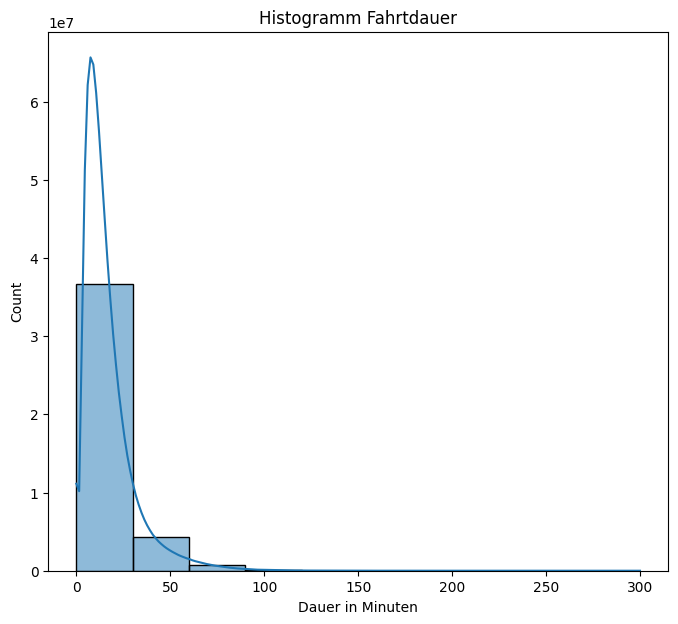

In [22]:
cleaned_df = df[df["trip_duration_min"] < 300]
cleaned_df = cleaned_df[cleaned_df["trip_duration_min"] > 0]

# Histogramm
plt.figure(figsize=(8,7))
sns.histplot(cleaned_df["trip_duration_min"], bins=10, kde=True)
plt.title("Histogramm Fahrtdauer")
plt.xlabel("Dauer in Minuten")
plt.show()

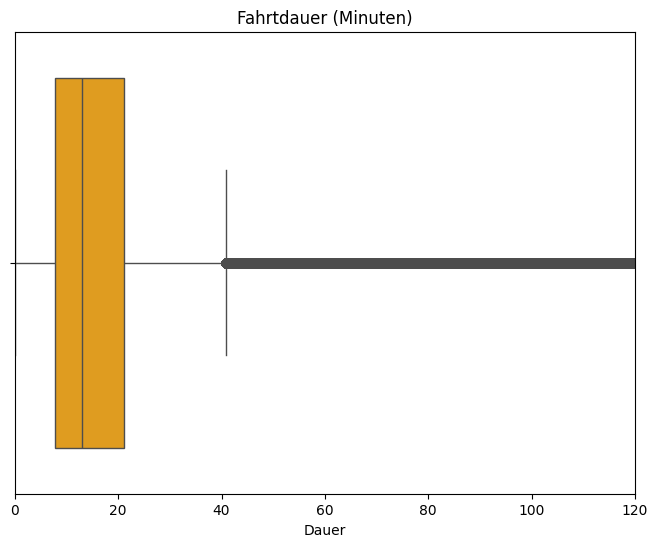

In [23]:
# Boxplot (alle Daten)
plt.figure(figsize=(8,6))
sns.boxplot(x=cleaned_df["trip_duration_min"], color="orange")
plt.title("Fahrtdauer (Minuten)")
plt.xlabel("Dauer")
plt.xlim(0, 120)
plt.show()

In [24]:
cleaned_df["trip_duration_min"].describe()

count    4.179048e+07
mean     1.674829e+01
std      1.388107e+01
min      1.666667e-02
25%      7.833333e+00
50%      1.296667e+01
75%      2.103333e+01
max      2.999167e+02
Name: trip_duration_min, dtype: float64

Das Histogramm sieht aus wie man es sich intuitiv erwarten würde. Eine Fahrt dauert durchschnittlich ca. 17 Minuten.

## 2) Locations
Zur veranschaulichung werden die LocationIDS mit den Location-names gemapped, um die Visualisierungen besser zu verstehen:

In [25]:
df_zones = pd.read_csv("./data/taxi_zone_lookup.csv")

df_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [26]:
df_locations_mapped = df
df_locations_mapped = df_locations_mapped.merge(
    df_zones[['LocationID', 'Zone']], 
    left_on="pickup_location_id",
    right_on="LocationID",
    how="left"
).rename(columns={"Zone": "PU_Zone"})

df_locations_mapped = df_locations_mapped.merge(
    df_zones[['LocationID', 'Zone']], 
    left_on="dropoff_location_id",
    right_on="LocationID",
    how="left"
).rename(columns={"Zone": "DO_Zone"})

df_locations_mapped.head()

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min,LocationID_x,PU_Zone,LocationID_y,DO_Zone
0,2,2024-04-01 00:18:50,2024-04-01 00:19:48,N,1.0,146,146,1.0,0.15,3.7,...,6.20,2.0,1.0,0.00,NaN,0.966667,146,Long Island City/Queens Plaza,146,Long Island City/Queens Plaza
1,2,2024-04-01 00:56:16,2024-04-01 01:12:56,N,1.0,65,225,1.0,3.06,17.7,...,24.24,1.0,1.0,0.00,NaN,16.666667,65,Downtown Brooklyn/MetroTech,225,Stuyvesant Heights
2,2,2024-04-01 00:23:09,2024-04-01 00:33:03,N,1.0,226,146,1.0,1.95,11.4,...,17.38,1.0,1.0,0.00,NaN,9.900000,226,Sunnyside,146,Long Island City/Queens Plaza
3,2,2024-03-31 22:34:23,2024-03-31 22:45:33,N,1.0,74,116,1.0,1.93,12.8,...,18.36,1.0,1.0,0.00,NaN,11.166667,74,East Harlem North,116,Hamilton Heights
4,2,2024-03-31 23:21:41,2024-03-31 23:29:40,N,1.0,236,238,1.0,1.50,10.7,...,16.75,1.0,1.0,2.75,NaN,7.983333,236,Upper East Side North,238,Upper West Side North


### Plot für die Pickup Zone:

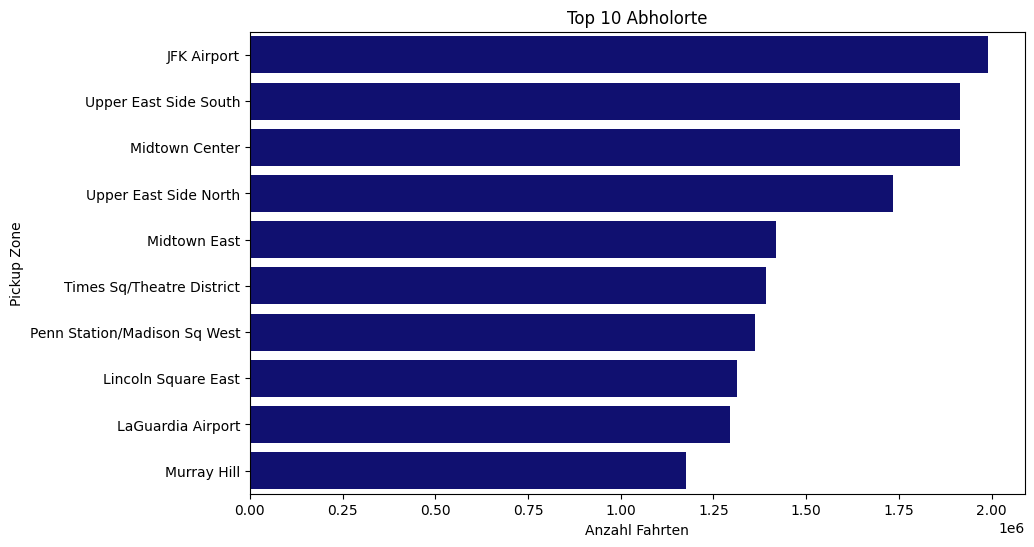

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(y=df_locations_mapped["PU_Zone"], order=df_locations_mapped["PU_Zone"].value_counts().head(10).index, color="navy")
plt.title("Top 10 Abholorte")
plt.xlabel("Anzahl Fahrten")
plt.ylabel("Pickup Zone")
plt.show()

### Plot für die Dropoff Zone:

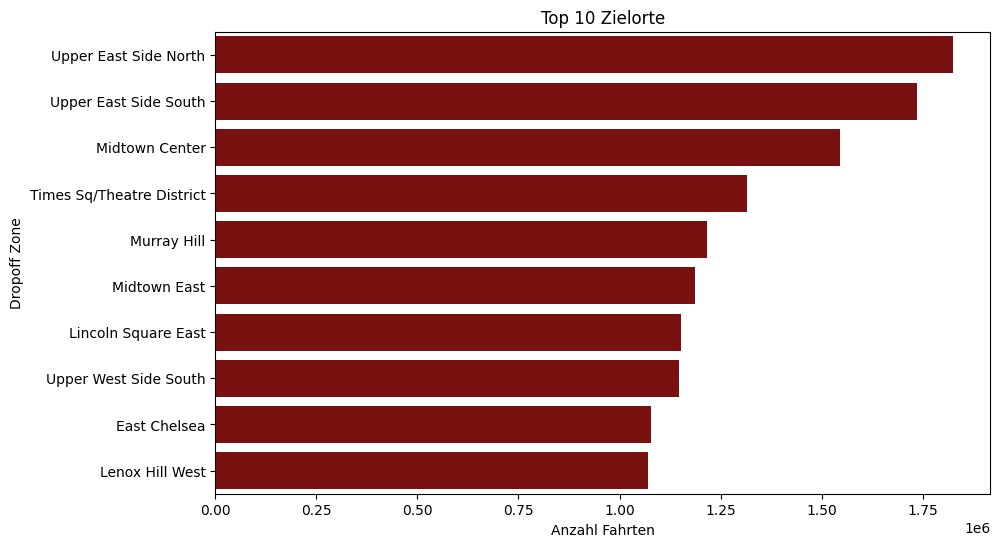

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(y=df_locations_mapped["DO_Zone"], order=df_locations_mapped["DO_Zone"].value_counts().head(10).index, color="darkred")
plt.title("Top 10 Zielorte")
plt.xlabel("Anzahl Fahrten")
plt.ylabel("Dropoff Zone")
plt.show()

In [29]:
df[['pickup_location_id', 'dropoff_location_id']].isnull().sum()

pickup_location_id     0
dropoff_location_id    0
dtype: int64

Die Locations beinhalten keine null-Werte. Es ist trotzdem nicht ausgeschlossen, dass die Daten fehlerfrei sind.

Im großen und ganzen machen die Daten aber einen passenden Eindruck.

## 3) Payment-Methods und Tip-amount:

Um auch das besser zu veranschaulichen, werden die payment-methods auch gemappt:

In [30]:
payment_map = {
    0: "Flex Fare",
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided"
}

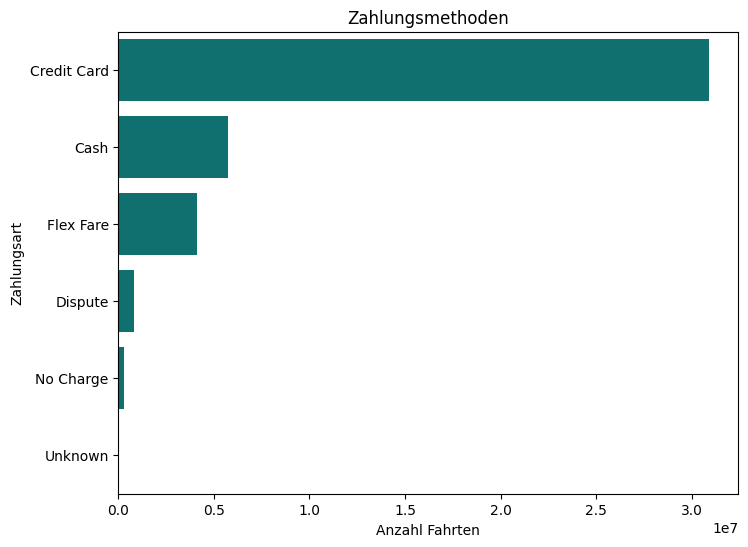

In [31]:
df_payment_types = df

df_payment_types["payment_type_name"] = df_payment_types["payment_type"].map(payment_map)

plt.figure(figsize=(8,6))
sns.countplot(y="payment_type_name", data=df_payment_types,
              order=df_payment_types["payment_type_name"].value_counts().index, color="teal")
plt.title("Zahlungsmethoden")
plt.xlabel("Anzahl Fahrten")
plt.ylabel("Zahlungsart")
plt.show()

Beim tip_amount gibt es scheinbar ebenfalls keine null Werte.

In [32]:
df["tip_amount"].isnull().sum()

np.int64(0)

In [33]:
df["tip_amount"].describe()

count    4.182994e+07
mean     3.296305e+00
std      4.081991e+00
min     -3.000000e+02
25%      0.000000e+00
50%      2.600000e+00
75%      4.200000e+00
max      9.999900e+02
Name: tip_amount, dtype: float64

Auch hier lassen sich wieder ausreißer finden.

Negative Werte:

In [34]:
df[df["tip_amount"] < 0]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min,payment_type_name
1007,2,2024-04-01 15:49:01,2024-04-01 15:49:55,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-4.51,3.0,1.0,0.0,NaN,0.900000,No Charge
5018,2,2024-04-03 15:19:54,2024-04-03 15:21:14,N,2.0,7,7,1.0,0.10,-70.0,...,0.0,NaN,-1.0,-89.38,3.0,1.0,0.0,NaN,1.333333,No Charge
35795,2,2024-04-20 14:43:42,2024-04-20 14:43:56,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0,NaN,0.233333,No Charge
35797,2,2024-04-20 14:45:42,2024-04-20 14:45:53,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0,NaN,0.183333,No Charge
37177,2,2024-04-21 10:19:00,2024-04-21 10:19:31,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-4.51,3.0,1.0,0.0,NaN,0.516667,No Charge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41807025,2,2024-01-20 19:40:12,2024-01-20 19:44:55,N,1.0,256,255,1.0,0.44,-5.8,...,0.0,NaN,-1.0,-8.76,3.0,1.0,0.0,NaN,4.716667,No Charge
41807243,2,2024-01-20 22:53:43,2024-01-20 22:58:30,N,1.0,256,255,2.0,0.51,-5.8,...,0.0,NaN,-1.0,-9.96,3.0,1.0,0.0,NaN,4.783333,No Charge
41807807,2,2024-01-21 11:16:49,2024-01-21 11:16:52,N,5.0,116,264,1.0,0.00,-14.0,...,0.0,NaN,-1.0,-15.01,3.0,2.0,0.0,NaN,0.050000,No Charge
41810349,2,2024-01-22 21:22:05,2024-01-22 21:22:18,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-5.51,3.0,1.0,0.0,NaN,0.216667,No Charge


In [35]:
negative_tip_amount = df[
    (df["tip_amount"] < 0) & 
    ((df["payment_type"] == 3) | (df["payment_type"] == 4))
]

negative_tip_amount

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min,payment_type_name
1007,2,2024-04-01 15:49:01,2024-04-01 15:49:55,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-4.51,3.0,1.0,0.0,NaN,0.900000,No Charge
5018,2,2024-04-03 15:19:54,2024-04-03 15:21:14,N,2.0,7,7,1.0,0.10,-70.0,...,0.0,NaN,-1.0,-89.38,3.0,1.0,0.0,NaN,1.333333,No Charge
35795,2,2024-04-20 14:43:42,2024-04-20 14:43:56,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0,NaN,0.233333,No Charge
35797,2,2024-04-20 14:45:42,2024-04-20 14:45:53,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0,NaN,0.183333,No Charge
37177,2,2024-04-21 10:19:00,2024-04-21 10:19:31,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-4.51,3.0,1.0,0.0,NaN,0.516667,No Charge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41807025,2,2024-01-20 19:40:12,2024-01-20 19:44:55,N,1.0,256,255,1.0,0.44,-5.8,...,0.0,NaN,-1.0,-8.76,3.0,1.0,0.0,NaN,4.716667,No Charge
41807243,2,2024-01-20 22:53:43,2024-01-20 22:58:30,N,1.0,256,255,2.0,0.51,-5.8,...,0.0,NaN,-1.0,-9.96,3.0,1.0,0.0,NaN,4.783333,No Charge
41807807,2,2024-01-21 11:16:49,2024-01-21 11:16:52,N,5.0,116,264,1.0,0.00,-14.0,...,0.0,NaN,-1.0,-15.01,3.0,2.0,0.0,NaN,0.050000,No Charge
41810349,2,2024-01-22 21:22:05,2024-01-22 21:22:18,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-5.51,3.0,1.0,0.0,NaN,0.216667,No Charge


1203 aus insgesamt 1390 fahrten mit negativem tip amount, haben bei der payment_method "no_charge" oder "dispute" angegeben. Das passt sehr gut zusammen, da dies auch einige negative Werte begründet. 

Diese 2 Payment_types sind für eine der User-stories wichtig. Daher werden die Daten gesondert in einer eigenen Tabelle abgespeichert, da sie nur im Zusammenhang mit dem Ort gefordert sind. Dinge wie Trinkgeld werden weggelassen.  


In [36]:
df[
    (df["total_amount"] < 0) & 
    ((df["payment_type"] == 3) | (df["payment_type"] == 4))
]

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Airport_fee,trip_duration_min,payment_type_name
438,2,2024-04-01 10:00:34,2024-04-01 10:00:38,N,5.0,41,41,1.0,0.09,-45.0,...,0.0,NaN,-1.0,-46.00,4.0,2.0,0.00,NaN,0.066667,Dispute
509,2,2024-04-01 10:50:45,2024-04-01 10:50:56,N,1.0,95,95,4.0,0.00,-3.0,...,0.0,NaN,-1.0,-4.50,4.0,1.0,0.00,NaN,0.183333,Dispute
552,2,2024-04-01 11:52:10,2024-04-01 11:54:30,N,1.0,168,159,1.0,0.15,-4.4,...,0.0,NaN,-1.0,-5.90,3.0,1.0,0.00,NaN,2.333333,No Charge
1007,2,2024-04-01 15:49:01,2024-04-01 15:49:55,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,NaN,-1.0,-4.51,3.0,1.0,0.00,NaN,0.900000,No Charge
1096,2,2024-04-01 15:46:15,2024-04-01 15:48:50,N,1.0,43,238,2.0,0.00,-4.4,...,0.0,NaN,-1.0,-5.90,4.0,1.0,0.00,NaN,2.583333,Dispute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41825356,2,2024-01-31 13:51:30,2024-01-31 13:51:44,N,1.0,75,75,1.0,0.00,-3.0,...,0.0,NaN,-0.3,-3.80,3.0,1.0,0.00,NaN,0.233333,No Charge
41825431,2,2024-01-31 14:33:24,2024-01-31 14:38:00,N,1.0,75,236,1.0,0.69,-6.5,...,0.0,NaN,-1.0,-10.75,4.0,1.0,-2.75,NaN,4.600000,Dispute
41825473,2,2024-01-31 14:27:01,2024-01-31 14:27:24,N,1.0,74,74,1.0,0.01,-3.0,...,0.0,NaN,-1.0,-4.50,3.0,1.0,0.00,NaN,0.383333,No Charge
41825900,2,2024-01-31 17:18:04,2024-01-31 17:25:40,N,1.0,74,41,1.0,0.89,-8.6,...,0.0,NaN,-1.0,-12.60,4.0,1.0,0.00,NaN,7.600000,Dispute


Aus letzterer Abfrage geht hervor, dass 461.659 Datensätze scheinbar "NoCharge" oder "Dispute" als Payment_Method haben und zusätzlich einen negativen total_amount.

Das sind einige Datensätze aus welchen man gesondert viel weitere Analyse betreiben kann. 

### Tip Amount visualisierung: 

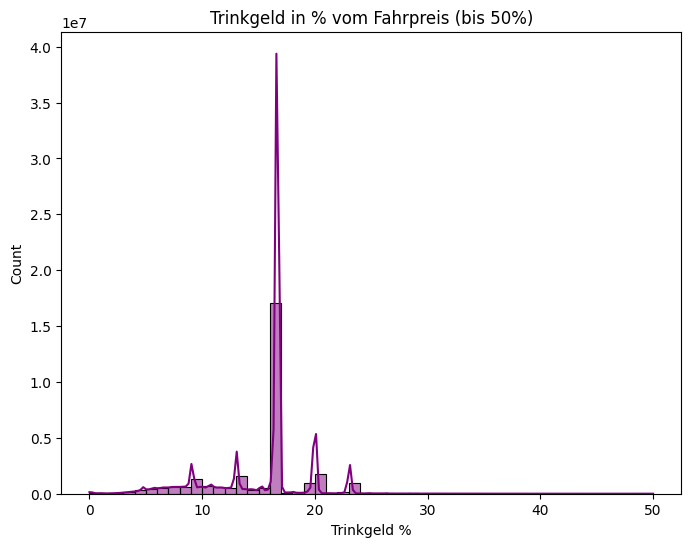

In [37]:
# Trinkgeld in %
df["tip_percent"] = (df["tip_amount"] / df["total_amount"]) * 100

plt.figure(figsize=(8,6))
sns.histplot(df[(df["tip_percent"] > 0) & (df["tip_percent"] < 50)]["tip_percent"], 
             bins=50, kde=True, color="purple")
plt.title("Trinkgeld in % vom Fahrpreis (bis 50%)")
plt.xlabel("Trinkgeld %")
plt.show()

Tips im Verhältnis zum PU_Location:

In [ ]:
df.groupby('PU_Zone')['tip_amount'].mean()